# ТВиМС Задания 2 и 3

## Вариант 14

***

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
a = 0
b = math.pi / 4

In [4]:
def get_x():
    return a + random.random()*(b-a)

def y_func(x):
    return math.tan(x)

def get_y():
    return y_func(get_x())

In [5]:
def generate_varseries(n):
    ys = []

    for i in range(n):
        ys.append(get_y())

    ys.sort()
    return ys

***

## Аналитическое расчеты:

![title](imgs/img2.jpg)

***

## Задание 1:

In [6]:
def Fy_deduced(y):
    if y < 0:
        return 0
    elif y > 1:
        return 1
    else:
        return 4 / math.pi * math.atan(y)

def fy_deduced(y):
    if y < 0 or y > 1:
        return 0
    else:
        return 4 / (math.pi * (1 + y**2))

In [7]:
def histogram_data_alpha(a, b, vs, group_num, normalize='nope'):
    """Return data needed for type 1 histogram
    as a list of tuples each being:
    (a bin's left bound, a bin's occurrences count)
    
    Each bin's interval has its left bound included
    and right excluded, e.g. [0, 1), [1, 2), [3, 4), ...
    """
    group_width = (b - a) / group_num
    hdata = [[a + i*group_width, 0] for i in range(group_num)]

    index = 0
    for v in vs:
        if index == group_num-1 or v < hdata[index+1][0]:
            hdata[index][1] += 1
        else:
            index += 1
            hdata[index][1] += 1

    if normalize == 'simple':
        for interval in hdata:
            interval[1] /= len(vs)
    elif normalize == 'for f(y)':
        square = 0
        for interval in hdata:
            square += group_width*interval[1]

        for interval in hdata:
            interval[1] /= square

    return hdata

In [8]:
def plot_histogram_alpha_and_polygon_and_fy(a, b, n, group_num, normalize='nope'):
    vs = generate_varseries(n)
    hdata = histogram_data_alpha(a, b, vs, group_num, normalize=normalize)
    ps = [(hdata[i][0] + hdata[i+1][0]) / 2 for i in range(len(hdata) - 1)]

    # plotting histogram:
    plt.step([hd[0] for hd in hdata],
             [hd[1] for hd in hdata],
             where='post')
    
    # plotting polygon:
    plt.scatter(ps,
                [hd[1] for hd in hdata[:-1]])
    plt.plot(ps,
             [hd[1] for hd in hdata[:-1]],
             label='полигон распределения')

    # plotting analytic:
    if normalize == 'for f(y)':
        xs = np.linspace(a, b, 1000)
        plt.plot(xs,
                 [fy_deduced(x) for x in xs],
                 label='аналитическая функция плотности')

    plt.legend()
    plt.show()

## Гистограмма. Равноинтервальный метод. Полигон распределения. Аналитическая функция плотности.

#### Interactive (not working on github):

In [9]:
interact(plot_histogram_alpha_and_polygon_and_fy, a=fixed(0), b=fixed(1), n=(1, 1000000), group_num=(1, 32), normalize=['nope', 'simple', 'for f(y)'])

interactive(children=(IntSlider(value=500000, description='n', max=1000000, min=1), IntSlider(value=16, descri…

<function __main__.plot_histogram_alpha_and_polygon_and_fy(a, b, n, group_num, normalize='nope')>

#### Demo:

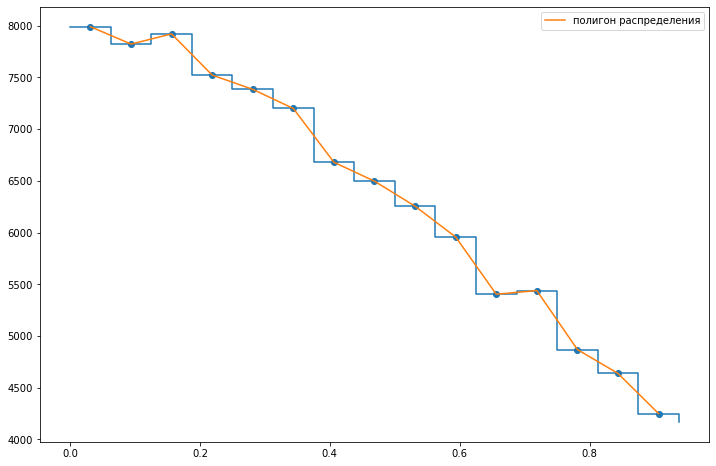

In [10]:
plot_histogram_alpha_and_polygon_and_fy(0, 1, 100000, 16, normalize='nope')

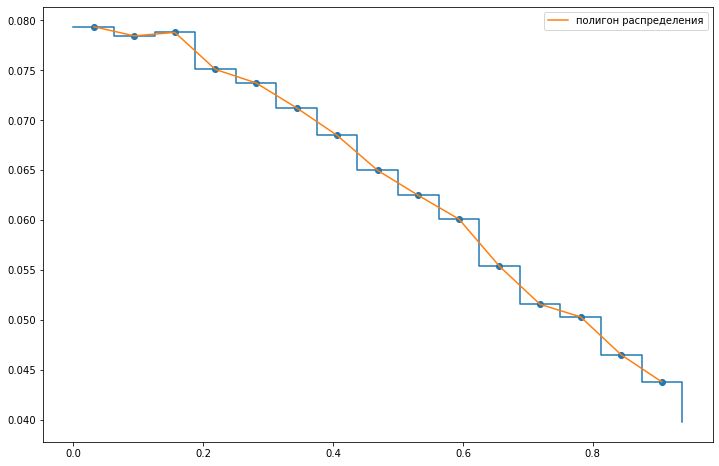

In [11]:
plot_histogram_alpha_and_polygon_and_fy(0, 1, 100000, 16, normalize='simple')

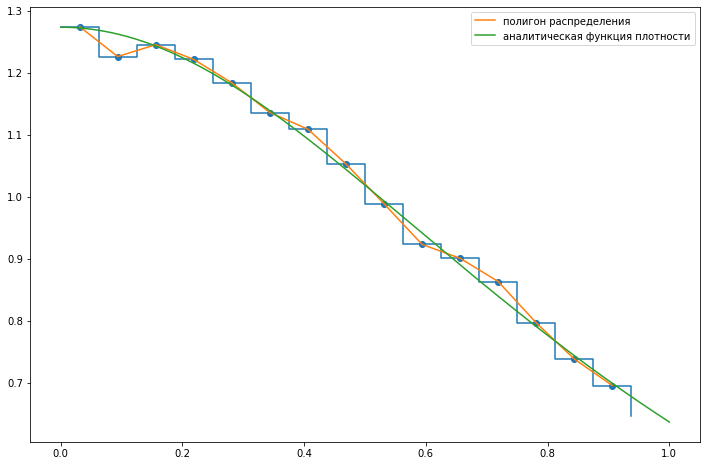

In [12]:
plot_histogram_alpha_and_polygon_and_fy(0, 1, 100000, 16, normalize='for f(y)')

## Эмпирическая функция распределения по сгруппированным данным.

In [13]:
def get_empirical_data_alpha(a, b, vs, group_num):
    hdata = histogram_data_alpha(a, b, vs, group_num, normalize='simple')
    
    for i in range(1, len(hdata)):
        hdata[i][1] += hdata[i-1][1]

    return hdata

In [14]:
def plot_empirical_alpha(a, b, n, group_num, analytic_func):
    vs = generate_varseries(n)
    
    empirical_data = get_empirical_data_alpha(a, b, vs, group_num)

    # I'm still struggling a bit to understand
    # what is going on with the indexes below

    # plotting empirical:
    plt.scatter([ed[0] for ed in empirical_data[1:]],
                [ed[1] for ed in empirical_data[:-1]])
    plt.plot([ed[0] for ed in empirical_data[1:]],
             [ed[1] for ed in empirical_data[:-1]],
             label='эмпирическая функция распределения')
    
    # plotting analytic:
    xs = np.linspace(a, b, 1000)
    plt.plot(xs,
             [analytic_func(x) for x in xs],
             label='аналитическая функция распределения')

    plt.legend()
    plt.show()

#### Interactive (not working on github):

In [15]:
interact(plot_empirical_alpha, a=fixed(0), b=fixed(1), n=(1, 1000000), group_num=(1, 32), analytic_func=fixed(Fy_deduced))

interactive(children=(IntSlider(value=500000, description='n', max=1000000, min=1), IntSlider(value=16, descri…

<function __main__.plot_empirical_alpha(a, b, n, group_num, analytic_func)>

#### Demo:

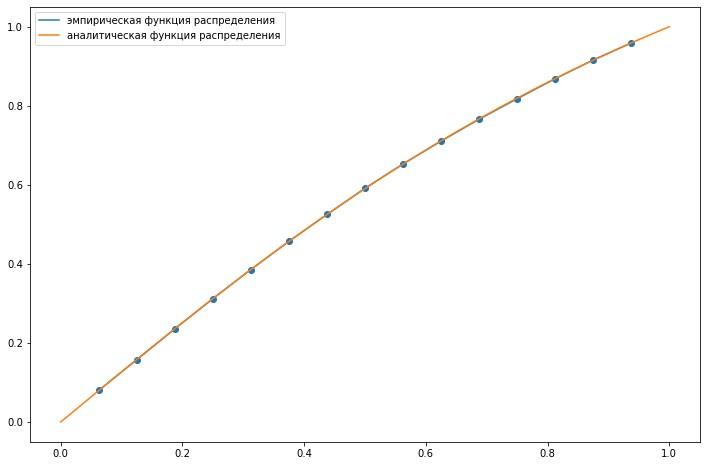

In [16]:
plot_empirical_alpha(0, 1, 100000, 16, Fy_deduced)

***

## Задание 2: